In [1]:
import matplotlib
import os
import seaborn as sns
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

scores_root = 'similarity_scores/'
plot_root = 'plots/'

if not os.path.exists(plot_root):
    os.mkdir(plot_root)

LaTeX = False

if LaTeX:
    import matplotlib
    matplotlib.use("pgf")
    plt.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

Real images


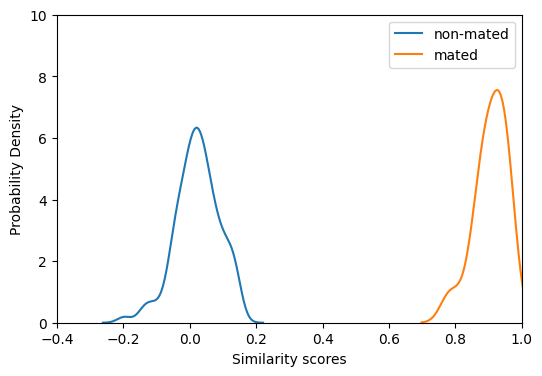

Plot saved as plots/real_images


In [2]:
# Baseline (Real images) non-mated and mated in one plot
print('Real images')
real_images_scores = pd.DataFrame()
score_files = [os.path.basename(file) for file in glob.glob(scores_root + '*.npy')]
plot_order = ['mated', 'non-mated']

for file in score_files:
    file_path = os.path.join(scores_root, file)
    if 'real' and not 'synthetic' in file:
        if 'non-mated' in file:
            comparison = 'non-mated'
        else:
            comparison = 'mated'
        scores = np.load(file_path)
        pd_scores = pd.DataFrame({'Comparison':comparison, "Score":scores})
        real_images_scores = pd.concat([real_images_scores, pd_scores], ignore_index=True)
real_images_scores=real_images_scores.reset_index(drop=True)

plt.figure(figsize=(6,4))
plt.xlim(-0.4,1)
plt.ylim(0,10)
plot = sns.kdeplot(data=real_images_scores, x="Score", hue=plot_order, common_norm=False)
plot.legend_.set_title(None)
if LaTeX:
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Similarity scores')
    plot.get_figure().savefig(plot_root + 'real_images.pgf', bbox_inches='tight')
else:
    plot.set_ylabel('Probability Density')
    plot.set_xlabel('Similarity scores')
    plt.show()

plot.get_figure().savefig(plot_root + 'real_images.png', bbox_inches='tight')
plot.get_figure().savefig(plot_root + 'real_images.pdf', bbox_inches='tight')
print(f'Plot saved as {plot_root}real_images')

Occlusion: cap


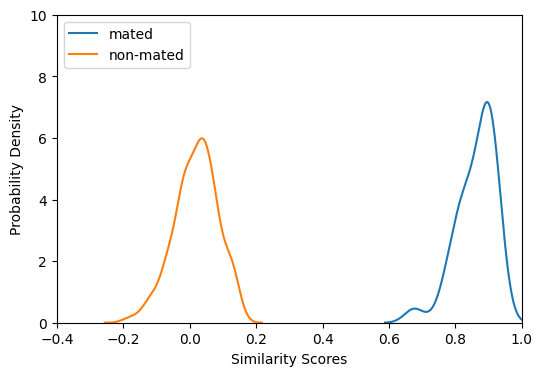

Plot saved as plots/real_vs_synthetic_cap
Occlusion: glass


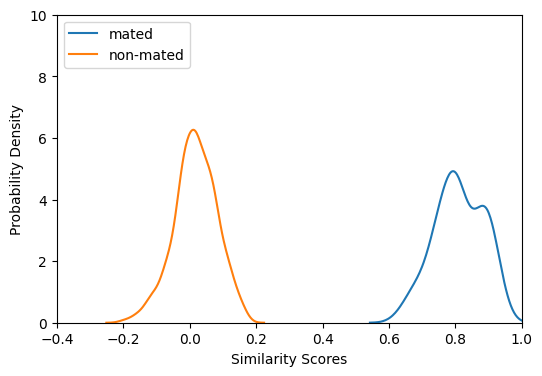

Plot saved as plots/real_vs_synthetic_glass
Occlusion: glass_cap


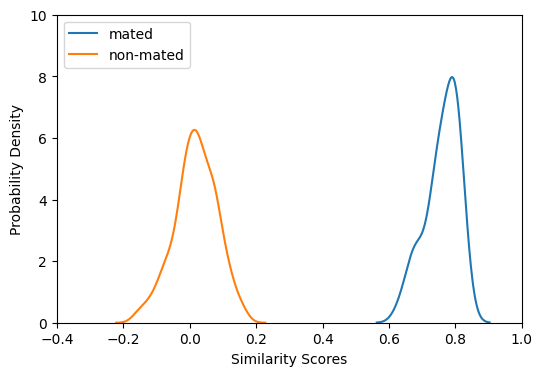

Plot saved as plots/real_vs_synthetic_glass_cap
Occlusion: sunglass


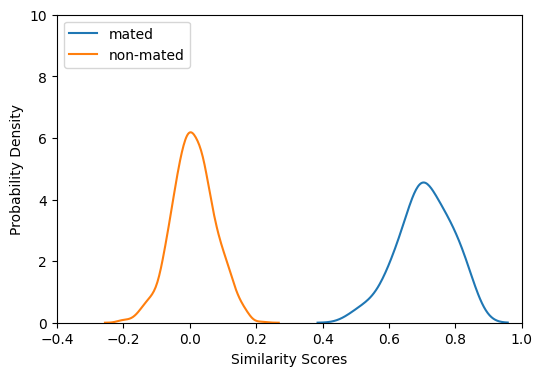

Plot saved as plots/real_vs_synthetic_sunglass
Occlusion: sunglass_cap


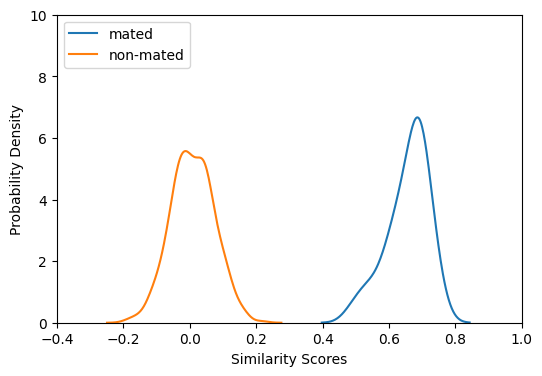

Plot saved as plots/real_vs_synthetic_sunglass_cap
Occlusion: mask


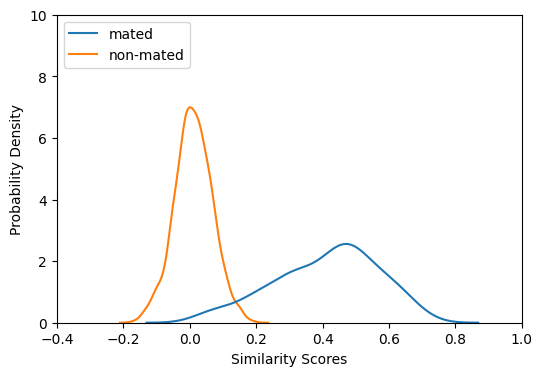

Plot saved as plots/real_vs_synthetic_mask
Occlusion: mask_cap


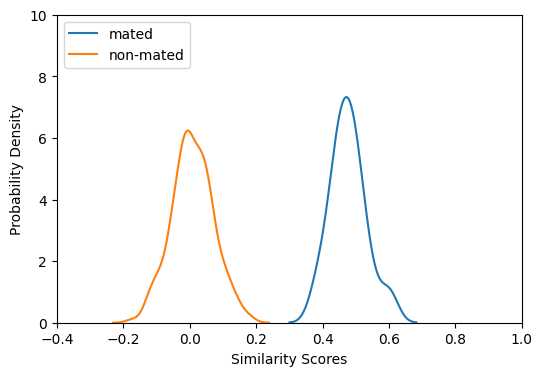

Plot saved as plots/real_vs_synthetic_mask_cap
Occlusion: mask_glass


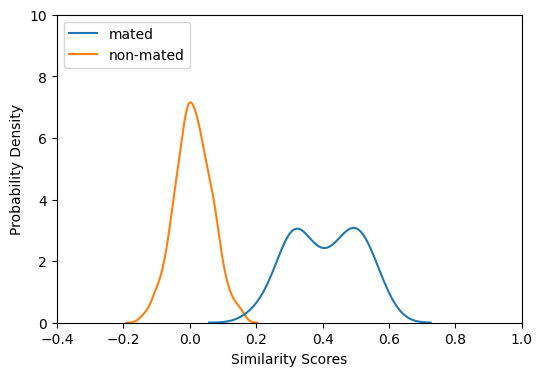

Plot saved as plots/real_vs_synthetic_mask_glass
Occlusion: mask_glass_cap


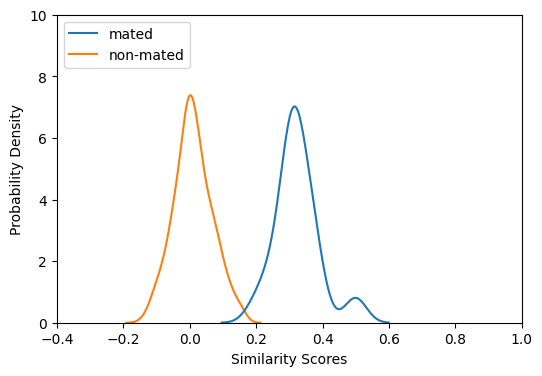

Plot saved as plots/real_vs_synthetic_mask_glass_cap
Occlusion: mask_sunglass


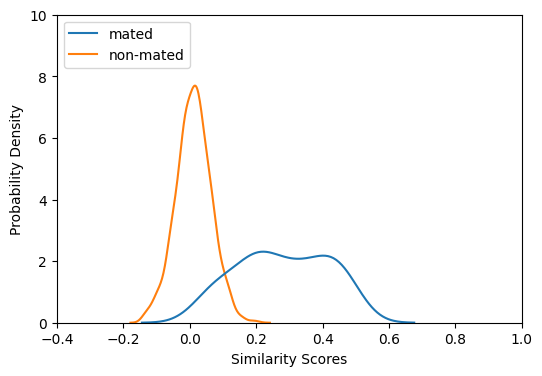

Plot saved as plots/real_vs_synthetic_mask_sunglass
Occlusion: mask_sunglass_cap


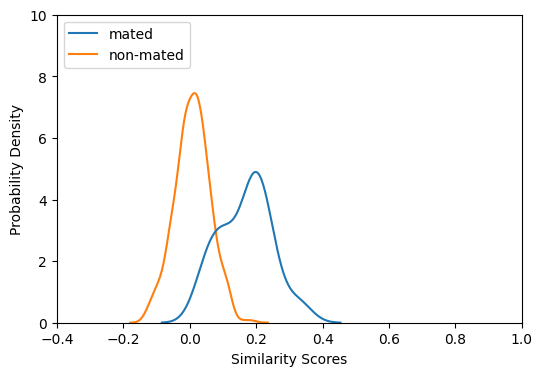

Plot saved as plots/real_vs_synthetic_mask_sunglass_cap


In [20]:
# Real vs synthetic with occlusions - plots mated and non-mated for each combination of occlusions
score_files = [os.path.basename(file) for file in glob.glob(scores_root + '*.npy')]
occlusion_order = ['cap', 'glass', 'glass_cap', 'sunglass', 'sunglass_cap', 'mask', 'mask_cap', 'mask_glass', 'mask_glass_cap', 'mask_sunglass', 'mask_sunglass_cap']
plot_order = ['mated', 'non-mated']
filtered_score_files = []
occlusions = []
for file in score_files:
    if any(substring in file for substring in occlusion_order):
        occlusions.append('_'.join(file.split('_')[3:-1]))
occlusions = [*set(occlusions)] # remove duplicates
occlusions = sorted(occlusions, key = occlusion_order.index)

for occlusion in occlusions:
    print(f'Occlusion: {occlusion}')
    real_vs_synthetic_scores = pd.DataFrame()
    filter = scores_root + '*synthetic_' + occlusion + '*'
    for file in [os.path.basename(file) for file in glob.glob(filter)]:
        file_path = os.path.join(scores_root, file)
        if 'non-mated' in file:
            comparison = 'non-mated'
        else:
            comparison = 'mated'
        scores = np.load(file_path)
        pd_scores = pd.DataFrame({'Comparison':comparison, "Score":scores})
        real_vs_synthetic_scores = pd.concat([real_vs_synthetic_scores, pd_scores], ignore_index=True)

    real_vs_synthetic_scores=real_vs_synthetic_scores.reset_index(drop=True)

    plt.figure(figsize=(6,4))
    plt.xlim(-0.4,1)
    plt.ylim(0,10)
    plot = sns.kdeplot(data=real_vs_synthetic_scores, x="Score", hue='Comparison', hue_order=plot_order, common_norm=False)
    plot.legend_.set_title(None)
    sns.move_legend(plot, loc='upper left')
    filename = 'real_vs_synthetic_' + occlusion
    if LaTeX:
        plot.set_ylabel(r'Probability Density')
        plot.set_xlabel(r'Similarity Scores')
        plot.get_figure().savefig(plot_root + filename + '.pgf', bbox_inches='tight')
    else:
        plot.set_ylabel('Probability Density')
        plot.set_xlabel('Similarity Scores')
        plt.show()
    plot.get_figure().savefig(plot_root + filename + '.png', bbox_inches='tight')
    plot.get_figure().savefig(plot_root + filename + '.pdf', bbox_inches='tight')
    print(f'Plot saved as {plot_root + filename}')

All mated


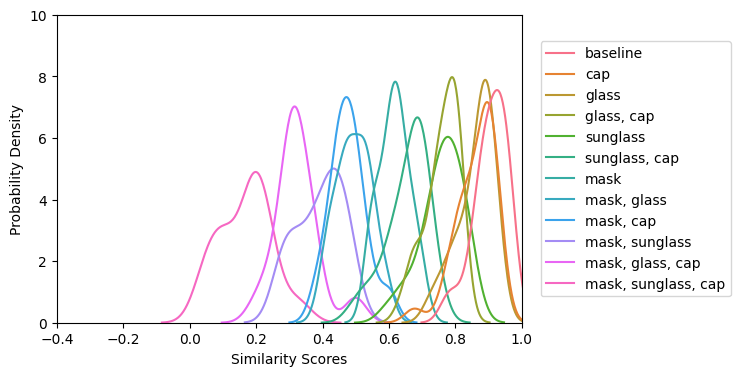

Plot saved as plots/mated
All non-mated


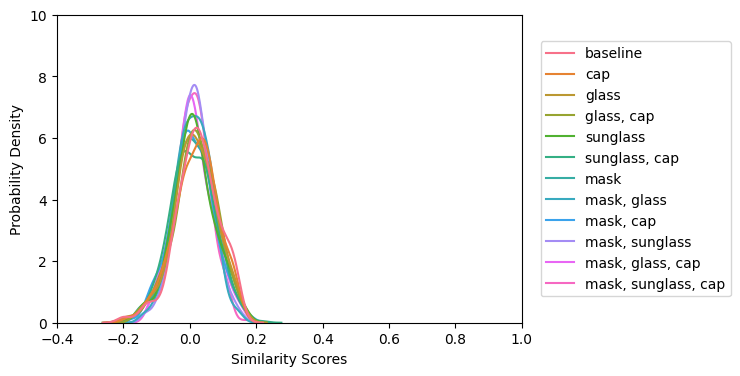

Plot saved as plots/non-mated


In [52]:
# Real images versus synthetic images with occlusions - all non-mated in one plot and all mated in one plot
print('All mated')
mated_score_files = [os.path.basename(file) for file in glob.glob(scores_root + '*_mated.npy')]
mated_scores = pd.DataFrame()

for file in mated_score_files:
    file_path = os.path.join(scores_root, file)
    if 'real' and not 'synthetic' in file:
        occlusion = 'baseline'
    elif 'synthetic' and not 'real' in file:
        continue
    else:
        occlusion = ', '.join(os.path.splitext(file)[0].split('_')[3:-1])
        if not occlusion:
            continue
    scores = np.load(file_path)
    pd_scores = pd.DataFrame({'Occlusion':occlusion, "Score":scores})
    mated_scores = pd.concat([mated_scores, pd_scores], ignore_index=True)

sort = mated_scores.groupby('Occlusion').mean().reset_index().sort_values(by=['Score'], ascending=False).Occlusion.tolist()
mated_scores.sort_values(by="Occlusion", key=lambda column: column.map(lambda e: sort.index(e)), inplace=True)
mated_scores.reset_index(drop=True)

plt.figure(figsize=(6,4))
plt.xlim(-0.4,1)
plt.ylim(0,10)
plot = sns.kdeplot(data=mated_scores, x="Score", hue='Occlusion', common_norm=False)
lgd = sns.move_legend(plot, loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plot.legend_.set_title(None)
if LaTeX:
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Similarity Scores')
    plot.get_figure().savefig(plot_root + 'mated.pgf',
                              bbox_extra_artists=(lgd), bbox_inches='tight')
else:
    plot.set_ylabel('Probability Density')
    plot.set_xlabel('Similarity Scores')
    plt.show()

plot.get_figure().savefig(plot_root + 'mated.png', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_root + 'mated.pdf', bbox_extra_artists=(lgd), bbox_inches='tight')
print(f'Plot saved as {plot_root}mated')

# All non-mated comparisons scores in one plot
print('All non-mated')
non_mated_score_files = [os.path.basename(file) for file in glob.glob(scores_root + '*non-mated.npy')]
non_mated_scores = pd.DataFrame()

for file in non_mated_score_files:
    file_path = os.path.join(scores_root, file)
    if 'real' and not 'synthetic' in file:
        occlusion = 'baseline'
    elif 'synthetic' and not 'real' in file:
        continue
    else:
        occlusion = ', '.join(os.path.splitext(file)[0].split('_')[3:-1])
        if not occlusion:
            continue
    scores = np.load(file_path)
    pd_scores = pd.DataFrame({'Occlusion':occlusion, "Score":scores})
    non_mated_scores = pd.concat([non_mated_scores, pd_scores], ignore_index=True)

non_mated_scores.sort_values(by="Occlusion", key=lambda column: column.map(lambda e: sort.index(e)), inplace=True)
non_mated_scores.reset_index(drop=True)

plt.figure(figsize=(6,4))
plt.xlim(-0.4,1)
plt.ylim(0,10)
plot = sns.kdeplot(data=non_mated_scores, x="Score", hue='Occlusion', common_norm=False)
lgd = sns.move_legend(plot, loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plot.legend_.set_title(None)
if LaTeX:
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Similarity Scores')
    plot.get_figure().savefig(plot_root + 'non-mated.pgf',
                              bbox_extra_artists=(lgd), bbox_inches='tight')
else:
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Similarity Scores')
    plt.show()

plot.get_figure().savefig(plot_root + 'non-mated.png', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_root + 'non-mated.pdf', bbox_extra_artists=(lgd), bbox_inches='tight')
print(f'Plot saved as {plot_root}non-mated')

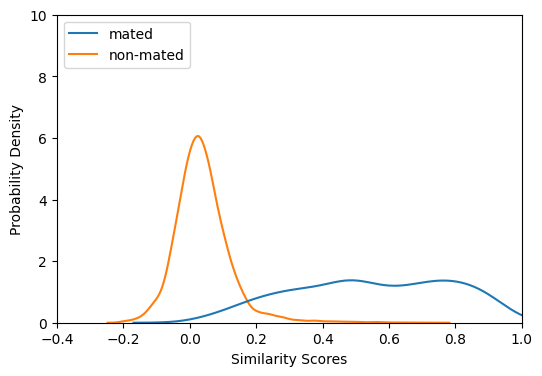

Plot saved as plots/real_vs_synthetic


In [55]:
# Real vs all synthetic
score_files = [os.path.basename(file) for file in glob.glob(scores_root + '*.npy')]
plot_order = ['mated', 'non-mated']
real_vs_synthetic_scores =  pd.DataFrame()

for file in score_files:
    file_path = os.path.join(scores_root, file)
    if 'real' and 'synthetic' in file and len(file.split('_')[3:-1]) == 0:
        if 'non-mated' in file:
            comparison = 'non-mated'
        else:
            comparison = 'mated'
        scores = np.load(file_path)
        pd_scores = pd.DataFrame({'Comparison':comparison, "Score":scores})
        real_vs_synthetic_scores = pd.concat([real_vs_synthetic_scores, pd_scores], ignore_index=True)
real_vs_synthetic_scores=real_vs_synthetic_scores.reset_index(drop=True)

plt.figure(figsize=(6,4))
plt.xlim(-0.4,1)
plt.ylim(0,10)
plot = sns.kdeplot(data=real_vs_synthetic_scores, x="Score", hue='Comparison', hue_order=plot_order, common_norm=False)
plot.legend_.set_title(None)
sns.move_legend(plot, loc='upper left')
filename = 'real_vs_synthetic'
if LaTeX:
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Similarity Scores')
    plot.get_figure().savefig(plot_root + filename + '.pgf', bbox_inches='tight')
else:
    plot.set_ylabel('Probability Density')
    plot.set_xlabel('Similarity Scores')
    plt.show()
plot.get_figure().savefig(plot_root + filename + '.png', bbox_inches='tight')
plot.get_figure().savefig(plot_root + filename + '.pdf', bbox_inches='tight')
print(f'Plot saved as {plot_root + filename}')